In [1]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.io import imsave
import glob
import pandas as pd
from matplotlib import rcParams
rcParams['figure.dpi']=200

In [12]:
# SAMPLE = 'TNP_pilot_cycif'
SAMPLE = 'PilotTonsil_5_z08' # This is the codex sample, folder was renamed to match the actual files coming out from the mcmicro run. 

DATA_DIR = f'data/{SAMPLE}' 

In [3]:
images = sorted(glob.glob(f"{DATA_DIR}/*/*tif") + glob.glob(f"{DATA_DIR}/*/*/*tif"))
images

['data/PilotTonsil_5_z08/probability-maps/unmicst/PilotTonsil_5_z08_Probabilities_0.tif',
 'data/PilotTonsil_5_z08/registration/PilotTonsil_5_z08.ome.tif',
 'data/PilotTonsil_5_z08/registration/PilotTonsil_5_z08_subset.ome.tif',
 'data/PilotTonsil_5_z08/segmentation/unmicst-PilotTonsil_5_z08/cellMask.tif',
 'data/PilotTonsil_5_z08/segmentation/unmicst-PilotTonsil_5_z08/cellMask_subset.tif',
 'data/PilotTonsil_5_z08/segmentation/unmicst-PilotTonsil_5_z08/cellRingMask.tif',
 'data/PilotTonsil_5_z08/segmentation/unmicst-PilotTonsil_5_z08/cytoMask.tif',
 'data/PilotTonsil_5_z08/segmentation/unmicst-PilotTonsil_5_z08/cytoRingMask.tif',
 'data/PilotTonsil_5_z08/segmentation/unmicst-PilotTonsil_5_z08/nucleiMask.tif',
 'data/PilotTonsil_5_z08/segmentation/unmicst-PilotTonsil_5_z08/nucleiRingMask.tif']

## ome-tiff

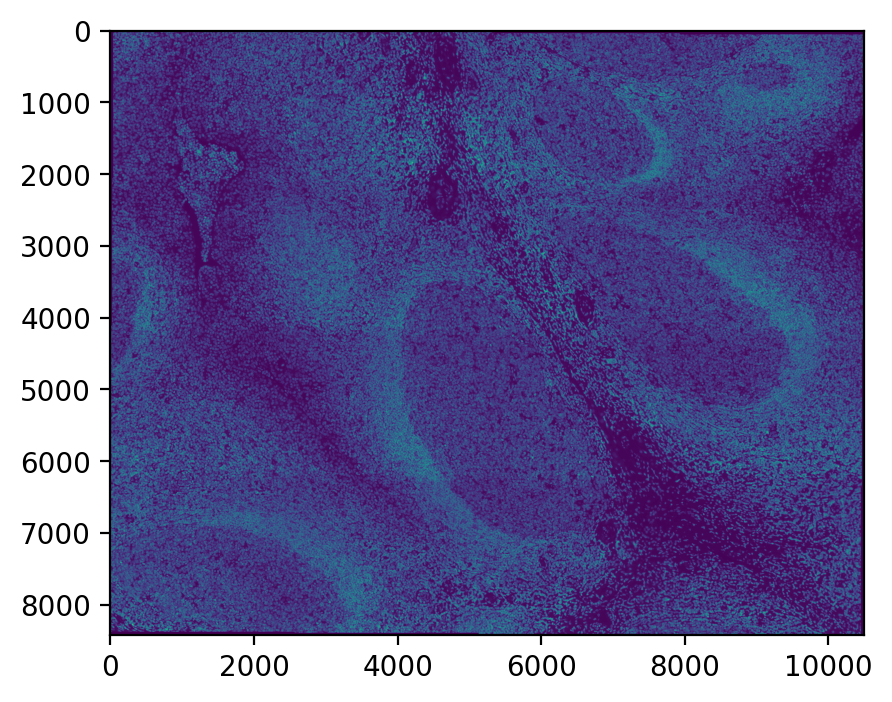

In [4]:
img = imread(images[1])
plt.imshow(img[0,...])

## The full sample is too big, get a subset
Different ranges for CyCIF and CODEX

In [6]:
# ### CYCIF
# # 200 * 200
# x_min = 15400
# x_max = x_min+200
# y_min = 8750
# y_max = y_min+200


### CODEX
# 1000 * 1000
x_min = 500
x_max = x_min+1000
y_min = 6000
y_max = y_min+1000

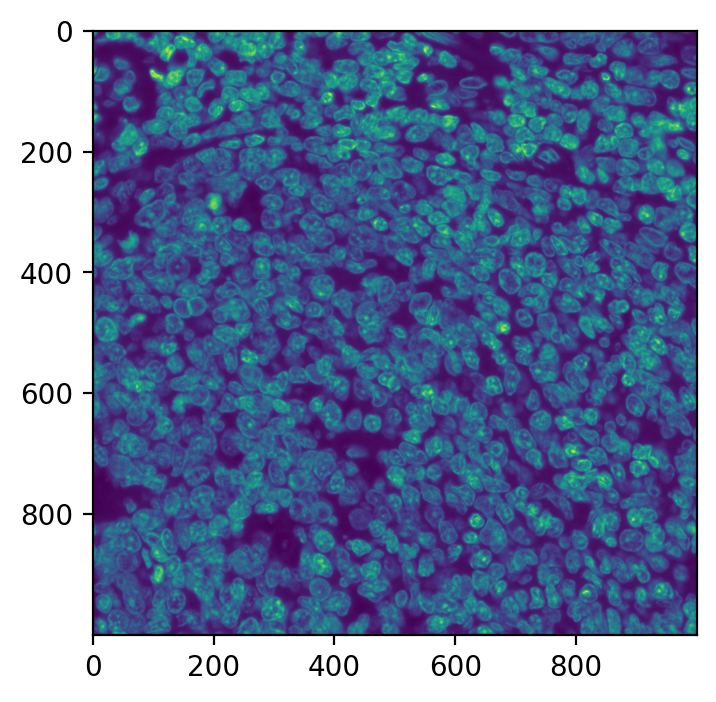

In [7]:
plt.imshow(img[0, x_min:x_max, y_min:y_max])

## Marker files
The markers.csv is messing the header. Similar file for CyCIF data has been fixed but not this one.

In [8]:
markers = pd.read_csv(f'{DATA_DIR}/markers.csv',header = None).iloc[:,0]
markers

0                      DNA1
1                    FITC_1
2                     Cy3_1
3                     Cy5_1
4                      DNA2
5                      CD20
6                 CD44(bad)
7          CD107a(bleached)
8                      DNA3
9                      CD31
10                    Cy3_3
11           CD68(bleached)
12                     DNA4
13                    panCK
14                      CD8
15                CD45(Dom)
16                     DNA5
17                   FITC_5
18                    Cy3_5
19                    Cy5_5
20                     DNA6
21                   FITC_6
22                    Cy3_6
23                    Cy5_6
24                     DNA7
25                   FITC_7
26                    Cy3_7
27                    Cy5_7
28                     DNA8
29                   FITC_8
30                    Cy3_8
31                    Cy5_8
32                     DNA9
33                     CD20
34                CD44(bad)
35    CD107a(less bl

## Save ome-tiff subset 

In [9]:
im_selected = img[:,x_min:x_max, y_min:y_max]
patch_name = images[1].replace('.ome','_subset.ome')
imsave(patch_name,im_selected)

In [10]:
im1 = imread(patch_name)
im1.shape

(40, 1000, 1000)

## Segmentation mask and save subset

/tmp/ipykernel_2211/1628176482.py:7: UserWarning: data/PilotTonsil_5_z08/segmentation/unmicst-PilotTonsil_5_z08/cellMask_subset.tif is a low contrast image
  imsave(patch_name,img1)


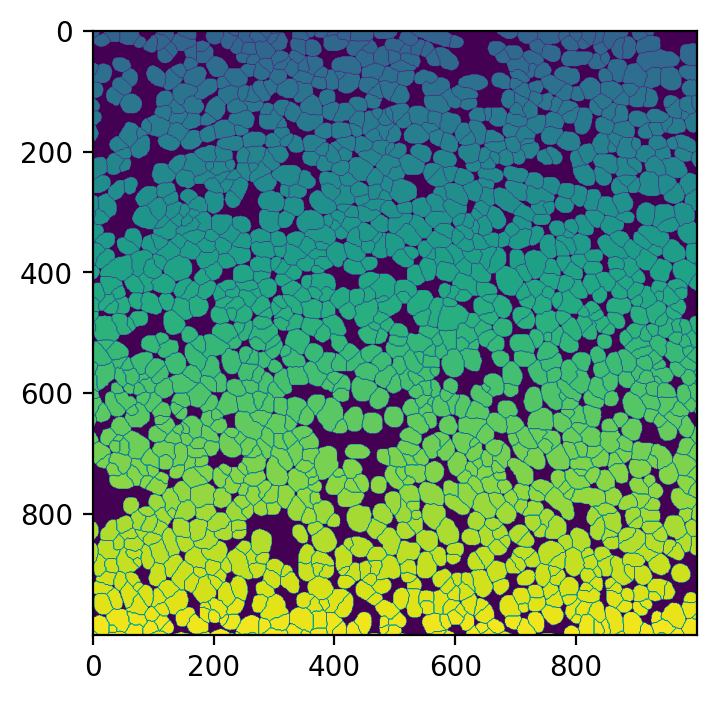

In [13]:
seg_mask_fname = f'{DATA_DIR}/segmentation/unmicst-{SAMPLE}/cellMask.tif'

img1 = imread(seg_mask_fname)[x_min:x_max, y_min:y_max]
plt.imshow(img1)

patch_name = seg_mask_fname.replace('.tif','_subset.tif')
imsave(patch_name,img1)